In [28]:
import torch

In [29]:
t1 = torch.tensor(4.)
t1.dtype

torch.float32

In [30]:
t2 = torch.tensor([1, 2, 3, 4], dtype=pt.float)
t2.dtype

torch.float32

In [31]:
t2 = torch.tensor([1., 2, 3, 4])
t2.dtype

torch.float32

In [32]:
t3 = torch.tensor([[5., 6], 
                   [7, 8], 
                   [9, 10]])
print(t3)
print(t3.shape, t3.size())

tensor([[ 5.,  6.],
        [ 7.,  8.],
        [ 9., 10.]])
torch.Size([3, 2]) torch.Size([3, 2])


In [33]:
# 3-dimensional array
t4 = torch.tensor([
    [[11, 12, 13], 
     [13, 14, 15]], 
    [[15, 16, 17], 
     [17, 18, 19.]]])
t4

tensor([[[11., 12., 13.],
         [13., 14., 15.]],

        [[15., 16., 17.],
         [17., 18., 19.]]])

In [34]:
for t in (t1, t2, t3, t4):
    print(t)
    print(t.shape, '\n')

tensor(4.)
torch.Size([]) 

tensor([1., 2., 3., 4.])
torch.Size([4]) 

tensor([[ 5.,  6.],
        [ 7.,  8.],
        [ 9., 10.]])
torch.Size([3, 2]) 

tensor([[[11., 12., 13.],
         [13., 14., 15.]],

        [[15., 16., 17.],
         [17., 18., 19.]]])
torch.Size([2, 2, 3]) 



In [35]:
torch.tensor([[5., 6, 11], 
                   [7, 8], 
                   [9, 10]])

ValueError: expected sequence of length 3 at dim 1 (got 2)

## Tensor operations and gradients

In [39]:
# enable 'autograd' / 'automatic gradients'; automatically compute the deriviative of y WRT w and b.
x = torch.tensor(3.)
w = torch.tensor(4., requires_grad=True)
b = torch.tensor(5., requires_grad=True)   
x, w, b

(tensor(3.), tensor(4., requires_grad=True), tensor(5., requires_grad=True))

In [40]:
y = w * x + b
y

tensor(17., grad_fn=<AddBackward0>)

In [41]:
# Compute derivatives
y.backward()

In [42]:
# Display gradients
print('dy/dx:', x.grad)
print('dy/dw:', w.grad)
print('dy/db:', b.grad)

dy/dx: None
dy/dw: tensor(3.)
dy/db: tensor(1.)


# Tensor functions

In [43]:
t6 = torch.full((3, 2), 42)
t6

tensor([[42, 42],
        [42, 42],
        [42, 42]])

In [44]:
t3

tensor([[ 5.,  6.],
        [ 7.,  8.],
        [ 9., 10.]])

In [45]:
t7 = torch.cat((t3, t6))
t7

tensor([[ 5.,  6.],
        [ 7.,  8.],
        [ 9., 10.],
        [42., 42.],
        [42., 42.],
        [42., 42.]])

In [46]:
# Compute the sin of each element
t8 = torch.sin(t7)
t8

tensor([[-0.9589, -0.2794],
        [ 0.6570,  0.9894],
        [ 0.4121, -0.5440],
        [-0.9165, -0.9165],
        [-0.9165, -0.9165],
        [-0.9165, -0.9165]])

In [47]:
# Change the shape of a tensor
t9 = t8.reshape(3, 2, 2)
t9

tensor([[[-0.9589, -0.2794],
         [ 0.6570,  0.9894]],

        [[ 0.4121, -0.5440],
         [-0.9165, -0.9165]],

        [[-0.9165, -0.9165],
         [-0.9165, -0.9165]]])

# Interoperability with Numpy

In [48]:
import numpy as np

x = np.array([[1, 2], 
              [3, 4.]])
x

array([[1., 2.],
       [3., 4.]])

In [49]:
y = torch.from_numpy(x)
y

tensor([[1., 2.],
        [3., 4.]], dtype=torch.float64)

In [51]:
x.dtype, y.dtype

(dtype('float64'), torch.float64)

In [52]:
z = y.numpy()
z

array([[1., 2.],
       [3., 4.]])

The interoperability between PyTorch and Numpy is essential because most datasets you'll work with will likely be read and preprocessed as Numpy arrays.

You might wonder why we need a library like PyTorch at all since Numpy already provides data structures and utilities for working with multi-dimensional numeric data. There are two main reasons:

    Autograd: The ability to automatically compute gradients for tensor operations is essential for training deep learning models.
    GPU support: While working with massive datasets and large models, PyTorch tensor operations can be performed efficiently using a Graphics Processing Unit (GPU). Computations that might typically take hours can be completed within minutes using GPUs.

We'll leverage both these features of PyTorch extensively in this tutorial series.


# Linear regression

In [53]:
# Input (temp, rainfall, humidity)
inputs = np.array([[73, 67, 43], 
                   [91, 88, 64], 
                   [87, 134, 58], 
                   [102, 43, 37], 
                   [69, 96, 70]], dtype='float32')

# Targets (apples, oranges)
targets = np.array([[56, 70], 
                    [81, 101], 
                    [119, 133], 
                    [22, 37], 
                    [103, 119]], dtype='float32')

# Convert inputs and targets to tensors
inputs = torch.from_numpy(inputs)
targets = torch.from_numpy(targets)
print(inputs)
print(targets)

# Weights and biases
w = torch.randn(2, 3, requires_grad=True)
b = torch.randn(2, requires_grad=True)
print(w)
print(b)


tensor([[ 73.,  67.,  43.],
        [ 91.,  88.,  64.],
        [ 87., 134.,  58.],
        [102.,  43.,  37.],
        [ 69.,  96.,  70.]])
tensor([[ 56.,  70.],
        [ 81., 101.],
        [119., 133.],
        [ 22.,  37.],
        [103., 119.]])
tensor([[-0.1963, -0.5610, -1.2942],
        [-0.3675,  1.7887,  0.2730]], requires_grad=True)
tensor([-1.1831, -1.8981], requires_grad=True)


In [55]:
def model(x):
    return x @ w.t() + b

# @ is matrix multiplication

In [56]:
# Generate predictions
preds = model(inputs)
print(preds)
# Compare with targets
print(targets)

tensor([[-108.7509,  102.8593],
        [-151.2438,  139.5408],
        [-168.5016,  221.6535],
        [ -93.2124,   47.6356],
        [-159.1795,  163.5728]], grad_fn=<AddBackward0>)
tensor([[ 56.,  70.],
        [ 81., 101.],
        [119., 133.],
        [ 22.,  37.],
        [103., 119.]])


In [57]:
# MSE loss
def mse(t1, t2):
    diff = t1 - t2
    return torch.sum(diff * diff) / diff.numel()

# numel is number of elements

In [62]:
# Compute loss
loss = mse(preds, targets)
print(loss)

tensor(25827.3594, grad_fn=<DivBackward0>)


## compute gradients

In [59]:
# Compute gradients
loss.backward()
print(w)
print(w.grad)

tensor([[-0.1963, -0.5610, -1.2942],
        [-0.3675,  1.7887,  0.2730]], requires_grad=True)
tensor([[-17603.1367, -20024.8672, -12247.6816],
        [  3555.8323,   4441.8120,   2507.0166]])


In [60]:
with torch.no_grad():
    w -= w.grad * 1e-5
    b -= b.grad * 1e-5

In [61]:
loss = mse(preds, targets)
print(loss)

tensor(25827.3594, grad_fn=<DivBackward0>)


In [63]:
w.grad.zero_()
b.grad.zero_()
print(w.grad, b.grad)

tensor([[0., 0., 0.],
        [0., 0., 0.]]) tensor([0., 0.])


## Train using grad descent

In [64]:
preds = model(inputs)
preds

tensor([[ -77.2153,   96.2091],
        [-109.7624,  130.7913],
        [-119.2477,  211.1534],
        [ -62.1127,   41.1707],
        [-119.2340,  155.0998]], grad_fn=<AddBackward0>)

In [65]:
loss = mse(preds, targets)
loss

tensor(17636.4492, grad_fn=<DivBackward0>)

In [66]:
loss.backward()
print(w.grad)
print(b.grad)

tensor([[-14345.0596, -16517.8047, -10084.7939],
        [  2867.9839,   3699.0254,   2049.5671]])
tensor([-173.7144,   34.8849])


In [67]:
# Adjust weights & reset gradients
with torch.no_grad():
    w -= w.grad * 1e-5
    b -= b.grad * 1e-5
    w.grad.zero_()
    b.grad.zero_()


In [68]:
print(w)
print(b)

tensor([[ 0.1232, -0.1956, -1.0709],
        [-0.4317,  1.7073,  0.2274]], requires_grad=True)
tensor([-1.1792, -1.8988], requires_grad=True)


In [69]:
# Calculate loss
preds = model(inputs)
loss = mse(preds, targets)
print(loss)

tensor(12114.2207, grad_fn=<DivBackward0>)


## Train for multiple epochs

In [71]:
for _ in range(100):
    preds = model(inputs)
    loss = mse(preds, targets)
    loss.backward()
    with torch.no_grad():
        w -= w.grad * 1e-5
        b -= b.grad * 1e-5
        w.grad.zero_()
        b.grad.zero_()

In [72]:
# Calculate loss
preds = model(inputs)
loss = mse(preds, targets)
print(loss)

tensor(270.3501, grad_fn=<DivBackward0>)


In [73]:
preds

tensor([[ 62.9919,  67.9583],
        [ 77.8760,  93.0045],
        [119.1718, 154.1657],
        [ 55.2558,  24.5867],
        [ 74.2117, 112.6805]], grad_fn=<AddBackward0>)

In [74]:
targets

tensor([[ 56.,  70.],
        [ 81., 101.],
        [119., 133.],
        [ 22.,  37.],
        [103., 119.]])

## using pytorch built-ins

In [75]:
import torch.nn as nn

In [76]:
# Input (temp, rainfall, humidity)
inputs = np.array([[73, 67, 43], 
                   [91, 88, 64], 
                   [87, 134, 58], 
                   [102, 43, 37], 
                   [69, 96, 70], 
                   [74, 66, 43], 
                   [91, 87, 65], 
                   [88, 134, 59], 
                   [101, 44, 37], 
                   [68, 96, 71], 
                   [73, 66, 44], 
                   [92, 87, 64], 
                   [87, 135, 57], 
                   [103, 43, 36], 
                   [68, 97, 70]], 
                  dtype='float32')

# Targets (apples, oranges)
targets = np.array([[56, 70], 
                    [81, 101], 
                    [119, 133], 
                    [22, 37], 
                    [103, 119],
                    [57, 69], 
                    [80, 102], 
                    [118, 132], 
                    [21, 38], 
                    [104, 118], 
                    [57, 69], 
                    [82, 100], 
                    [118, 134], 
                    [20, 38], 
                    [102, 120]], 
                   dtype='float32')

inputs = torch.from_numpy(inputs)
targets = torch.from_numpy(targets)

In [77]:
inputs

tensor([[ 73.,  67.,  43.],
        [ 91.,  88.,  64.],
        [ 87., 134.,  58.],
        [102.,  43.,  37.],
        [ 69.,  96.,  70.],
        [ 74.,  66.,  43.],
        [ 91.,  87.,  65.],
        [ 88., 134.,  59.],
        [101.,  44.,  37.],
        [ 68.,  96.,  71.],
        [ 73.,  66.,  44.],
        [ 92.,  87.,  64.],
        [ 87., 135.,  57.],
        [103.,  43.,  36.],
        [ 68.,  97.,  70.]])

In [78]:
from torch.utils.data import TensorDataset

In [79]:
# Define dataset
train_ds = TensorDataset(inputs, targets)
train_ds[0:3]

(tensor([[ 73.,  67.,  43.],
         [ 91.,  88.,  64.],
         [ 87., 134.,  58.]]),
 tensor([[ 56.,  70.],
         [ 81., 101.],
         [119., 133.]]))

In [80]:
from torch.utils.data import DataLoader

# Define data loader
batch_size = 5
train_dl = DataLoader(train_ds, batch_size, shuffle=True)

In [81]:
for xb, yb in train_dl:
    print(xb)
    print(yb)
    break

tensor([[ 91.,  88.,  64.],
        [103.,  43.,  36.],
        [101.,  44.,  37.],
        [ 91.,  87.,  65.],
        [ 69.,  96.,  70.]])
tensor([[ 81., 101.],
        [ 20.,  38.],
        [ 21.,  38.],
        [ 80., 102.],
        [103., 119.]])


In [82]:
# Define model
model = nn.Linear(3, 2)
print(model.weight)
print(model.bias)

Parameter containing:
tensor([[ 0.3692, -0.0276,  0.0190],
        [-0.3137, -0.5265, -0.0547]], requires_grad=True)
Parameter containing:
tensor([0.4914, 0.1170], requires_grad=True)


In [83]:
# Parameters
list(model.parameters())

[Parameter containing:
 tensor([[ 0.3692, -0.0276,  0.0190],
         [-0.3137, -0.5265, -0.0547]], requires_grad=True),
 Parameter containing:
 tensor([0.4914, 0.1170], requires_grad=True)]

In [84]:
# Generate predictions
preds = model(inputs)
preds

tensor([[  26.4100,  -60.4079],
        [  32.8748,  -78.2588],
        [  30.0129, -100.8942],
        [  37.6659,  -56.5410],
        [  24.6454,  -75.8978],
        [  26.8068,  -60.1951],
        [  32.9215,  -77.7870],
        [  30.4011, -101.2626],
        [  37.2691,  -56.7538],
        [  24.2952,  -75.6388],
        [  26.4566,  -59.9361],
        [  33.2716,  -78.0460],
        [  29.9662, -101.3660],
        [  38.0161,  -56.8000],
        [  24.2485,  -76.1106]], grad_fn=<AddmmBackward>)

In [85]:
# Import nn.functional
import torch.nn.functional as F

In [86]:
# Define loss function
loss_fn = F.mse_loss
loss = loss_fn(model(inputs), targets)
print(loss)

tensor(16799.7285, grad_fn=<MseLossBackward>)


## optimizer

In [87]:
# Define optimizer
opt = torch.optim.SGD(model.parameters(), lr=1e-5)

### Train the model

In [88]:
# Utility function to train the model
def fit(num_epochs, model, loss_fn, opt, train_dl):
    
    # Repeat for given number of epochs
    for epoch in range(num_epochs):
        
        # Train with batches of data
        for xb, yb in train_dl:
            
            # 1. Generate predictions
            pred = model(xb)
            
            # 2. Calculate loss
            loss = loss_fn(pred, yb)
            
            # 3. Compute gradients
            loss.backward()
            
            # 4. Update parameters using gradients
            opt.step()
            
            # 5. Reset the gradients to zero
            opt.zero_grad()
        
        # Print the progress
        if (epoch+1) % 10 == 0:
            print('Epoch [{}/{}], Loss: {:.4f}'.format(epoch+1, num_epochs, loss.item()))

In [89]:
fit(100, model, loss_fn, opt, train_dl)

Epoch [10/100], Loss: 271.8492
Epoch [20/100], Loss: 412.0470
Epoch [30/100], Loss: 439.5253
Epoch [40/100], Loss: 176.4637
Epoch [50/100], Loss: 191.4943
Epoch [60/100], Loss: 30.5090
Epoch [70/100], Loss: 83.4896
Epoch [80/100], Loss: 30.3621
Epoch [90/100], Loss: 53.0347
Epoch [100/100], Loss: 16.6919


In [91]:
# Generate predictions
preds = model(inputs)
preds

tensor([[ 58.7286,  71.6750],
        [ 80.7548,  99.4447],
        [118.6558, 133.3097],
        [ 30.0977,  44.8099],
        [ 94.2890, 112.4989],
        [ 57.6704,  70.7392],
        [ 80.2696,  99.2645],
        [118.8212, 133.8070],
        [ 31.1559,  45.7457],
        [ 94.8621, 113.2545],
        [ 58.2434,  71.4948],
        [ 79.6966,  98.5089],
        [119.1410, 133.4900],
        [ 29.5246,  44.0543],
        [ 95.3472, 113.4347]], grad_fn=<AddmmBackward>)

In [92]:
targets

tensor([[ 56.,  70.],
        [ 81., 101.],
        [119., 133.],
        [ 22.,  37.],
        [103., 119.],
        [ 57.,  69.],
        [ 80., 102.],
        [118., 132.],
        [ 21.,  38.],
        [104., 118.],
        [ 57.,  69.],
        [ 82., 100.],
        [118., 134.],
        [ 20.,  38.],
        [102., 120.]])

In [93]:
preds - targets

tensor([[ 2.7286,  1.6750],
        [-0.2452, -1.5553],
        [-0.3442,  0.3097],
        [ 8.0977,  7.8099],
        [-8.7110, -6.5011],
        [ 0.6704,  1.7392],
        [ 0.2696, -2.7355],
        [ 0.8212,  1.8070],
        [10.1559,  7.7457],
        [-9.1379, -4.7455],
        [ 1.2434,  2.4948],
        [-2.3034, -1.4911],
        [ 1.1410, -0.5100],
        [ 9.5246,  6.0543],
        [-6.6528, -6.5653]], grad_fn=<SubBackward0>)

In [94]:
model(torch.tensor([[75, 63, 44.]]))

tensor([[55.2727, 68.8164]], grad_fn=<AddmmBackward>)

# Working with Images & Logistic Regression in PyTorch

In [97]:
# Imports
import torch
import torchvision
from torchvision.datasets import MNIST

In [98]:
# Download training dataset
dataset = MNIST(root='data/', download=True)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw



/Users/home/bin/anaconda3/envs/good/lib/python3.8/site-packages/torchvision/datasets/mnist.py:498: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /tmp/pip-req-build-k42uejxm/torch/csrc/utils/tensor_numpy.cpp:143.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [99]:
len(dataset)

60000

In [100]:
test_dataset = MNIST(root='data/', train=False)
len(test_dataset)

10000

In [101]:
dataset[0]

(<PIL.Image.Image image mode=L size=28x28 at 0x7FF648567A90>, 5)

Label: 5


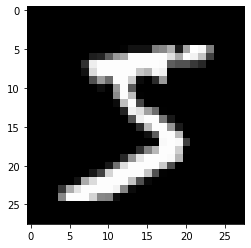

In [102]:
import matplotlib.pyplot as plt
%matplotlib inline

image, label = dataset[0]
plt.imshow(image, cmap='gray')
print('Label:', label)

In [103]:
import torchvision.transforms as transforms

PyTorch datasets allow us to specify one or more transformation functions that are applied to the images as they are loaded. The torchvision.transforms module contains many such predefined functions. We'll use the ToTensor transform to convert images into PyTorch tensors.


In [104]:
# MNIST dataset (images and labels)
dataset = MNIST(root='data/', 
                train=True,
                transform=transforms.ToTensor())

In [105]:
img_tensor, label = dataset[0]
print(img_tensor.shape, label)

torch.Size([1, 28, 28]) 5


In [106]:
print(img_tensor[0,10:15,10:15])
print(torch.max(img_tensor), torch.min(img_tensor))

tensor([[0.0039, 0.6039, 0.9922, 0.3529, 0.0000],
        [0.0000, 0.5451, 0.9922, 0.7451, 0.0078],
        [0.0000, 0.0431, 0.7451, 0.9922, 0.2745],
        [0.0000, 0.0000, 0.1373, 0.9451, 0.8824],
        [0.0000, 0.0000, 0.0000, 0.3176, 0.9412]])
tensor(1.) tensor(0.)


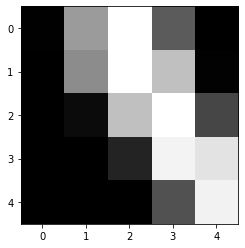

In [107]:
# Plot the image by passing in the 28x28 matrix
plt.imshow(img_tensor[0,10:15,10:15], cmap='gray')

In [108]:
from torch.utils.data import random_split

train_ds, val_ds = random_split(dataset, [50000, 10000])
len(train_ds), len(val_ds)

(50000, 10000)

In [110]:
from torch.utils.data import DataLoader

batch_size = 128
train_loader = DataLoader(train_ds, batch_size, shuffle=True)
val_loader = DataLoader(val_ds, batch_size)

In [111]:
import torch.nn as nn

input_size = 28 * 28
num_classes = 10

# Logistic regression model
model = nn.Linear(input_size, num_classes)

In [112]:
print(model.weight.shape)

torch.Size([10, 784])


In [113]:
model.weight

Parameter containing:
tensor([[-0.0093,  0.0228,  0.0141,  ...,  0.0109,  0.0265,  0.0267],
        [-0.0005, -0.0066, -0.0300,  ...,  0.0090,  0.0182,  0.0148],
        [-0.0146, -0.0049, -0.0334,  ...,  0.0299,  0.0073, -0.0206],
        ...,
        [-0.0060,  0.0007, -0.0086,  ..., -0.0107,  0.0346, -0.0158],
        [ 0.0295, -0.0032,  0.0005,  ..., -0.0328, -0.0106, -0.0070],
        [ 0.0200, -0.0270,  0.0183,  ...,  0.0106,  0.0109, -0.0356]],
       requires_grad=True)

In [114]:
model.bias

Parameter containing:
tensor([ 0.0077,  0.0294,  0.0198,  0.0084,  0.0081,  0.0208,  0.0151,  0.0072,
         0.0264, -0.0258], requires_grad=True)

In [115]:
for images, labels, in train_loader:
    print(labels)
    print(images.shape)
    outputs = model(images)
    print(outputs)
    break

tensor([4, 5, 1, 5, 7, 6, 1, 8, 1, 9, 9, 1, 5, 9, 1, 5, 1, 1, 5, 3, 4, 8, 1, 4,
        4, 3, 6, 8, 2, 6, 0, 1, 5, 7, 0, 0, 4, 9, 5, 1, 8, 1, 2, 0, 8, 7, 2, 1,
        7, 5, 1, 8, 1, 3, 3, 4, 7, 6, 0, 0, 2, 9, 8, 6, 1, 5, 9, 7, 6, 4, 1, 0,
        0, 1, 1, 7, 1, 1, 9, 4, 0, 7, 8, 0, 7, 2, 4, 7, 7, 1, 2, 1, 7, 1, 7, 6,
        7, 3, 8, 8, 0, 0, 6, 7, 3, 1, 4, 3, 5, 0, 5, 6, 2, 3, 9, 5, 1, 9, 2, 6,
        2, 1, 1, 7, 8, 6, 0, 1])
torch.Size([128, 1, 28, 28])


RuntimeError: mat1 and mat2 shapes cannot be multiplied (3584x28 and 784x10)

In [116]:
class MnistModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(input_size, num_classes)
        
    def forward(self, xb):
        xb = xb.reshape(-1, 784)
        return self.linear(xb)
    
model = MnistModel()        

In [117]:
model.linear

Linear(in_features=784, out_features=10, bias=True)

In [119]:
print(model.linear.weight.shape, model.linear.bias.shape)
list(model.parameters())

torch.Size([10, 784]) torch.Size([10])


[Parameter containing:
 tensor([[ 0.0030, -0.0327,  0.0098,  ...,  0.0128,  0.0157, -0.0149],
         [-0.0331, -0.0265, -0.0348,  ...,  0.0254, -0.0030,  0.0093],
         [ 0.0130,  0.0174, -0.0179,  ..., -0.0045, -0.0186, -0.0151],
         ...,
         [-0.0259,  0.0042, -0.0344,  ...,  0.0311, -0.0224, -0.0093],
         [ 0.0111,  0.0038, -0.0060,  ..., -0.0297, -0.0204,  0.0026],
         [-0.0330,  0.0124, -0.0279,  ..., -0.0008, -0.0310, -0.0256]],
        requires_grad=True),
 Parameter containing:
 tensor([-0.0356, -0.0035,  0.0318, -0.0132, -0.0203, -0.0014, -0.0023,  0.0157,
         -0.0055, -0.0330], requires_grad=True)]

In [120]:
for images, labels in train_loader:
    print(images.shape)
    outputs = model(images)
    break
    
print('outputs.shape : ', outputs.shape)
print('Sample outputs :\n', outputs[:2].data)

torch.Size([128, 1, 28, 28])
outputs.shape :  torch.Size([128, 10])
Sample outputs :
 tensor([[-0.1746,  0.0252, -0.2429,  0.0882,  0.1402,  0.1986,  0.0651,  0.0425,
         -0.2185,  0.2959],
        [ 0.2169,  0.0542, -0.4321, -0.0708,  0.2001,  0.0438, -0.0465,  0.1344,
         -0.2962,  0.4839]])


In [121]:
import torch.nn.functional as F

# Apply softmax for each output row
probs = F.softmax(outputs, dim=1)

print('Sample probs: \n', probs[:2].data)

print('Sum: ', torch.sum(probs[0]).item())

Sample probs: 
 tensor([[0.0810, 0.0989, 0.0756, 0.1053, 0.1109, 0.1176, 0.1029, 0.1006, 0.0775,
         0.1296],
        [0.1171, 0.0995, 0.0612, 0.0878, 0.1151, 0.0985, 0.0900, 0.1078, 0.0701,
         0.1529]])
Sum:  0.9999999403953552


In [122]:
max_probs, preds = torch.max(probs, dim=1)

print(preds)
print(max_probs)

tensor([9, 9, 3, 7, 3, 1, 9, 3, 3, 1, 9, 9, 4, 6, 3, 9, 9, 5, 5, 9, 1, 9, 9, 6,
        0, 4, 4, 3, 7, 6, 5, 3, 0, 9, 5, 4, 3, 1, 9, 9, 9, 0, 9, 0, 0, 9, 9, 4,
        9, 9, 3, 9, 0, 0, 4, 7, 9, 3, 9, 4, 9, 7, 3, 6, 6, 4, 3, 3, 9, 0, 1, 0,
        9, 0, 9, 9, 5, 4, 9, 7, 0, 9, 9, 3, 9, 9, 9, 0, 0, 4, 9, 3, 1, 4, 1, 7,
        9, 9, 9, 3, 9, 6, 3, 1, 0, 0, 9, 1, 9, 3, 4, 7, 4, 7, 9, 4, 9, 9, 4, 0,
        6, 0, 9, 0, 4, 0, 9, 5])
tensor([0.1296, 0.1529, 0.1323, 0.1313, 0.1346, 0.1102, 0.1273, 0.1455, 0.1223,
        0.1214, 0.1606, 0.1381, 0.1280, 0.1214, 0.1280, 0.1404, 0.1273, 0.1179,
        0.1165, 0.1185, 0.1229, 0.1325, 0.1385, 0.1288, 0.1330, 0.1350, 0.1208,
        0.1249, 0.1173, 0.1416, 0.1227, 0.1234, 0.1429, 0.1462, 0.1229, 0.1301,
        0.1375, 0.1288, 0.1398, 0.1424, 0.1306, 0.1271, 0.1316, 0.1434, 0.1292,
        0.1395, 0.1498, 0.1265, 0.1392, 0.1496, 0.1193, 0.1294, 0.1488, 0.1346,
        0.1283, 0.1374, 0.1454, 0.1189, 0.1213, 0.1295, 0.1495, 0.1247, 0.1225,
       

In [123]:
labels

tensor([1, 0, 4, 2, 5, 7, 3, 4, 8, 9, 8, 8, 3, 4, 4, 6, 9, 3, 0, 1, 5, 5, 8, 0,
        6, 2, 0, 8, 1, 3, 2, 8, 8, 7, 2, 6, 8, 9, 8, 1, 1, 4, 1, 0, 4, 5, 1, 4,
        9, 4, 0, 1, 6, 0, 0, 6, 5, 3, 2, 1, 4, 3, 8, 0, 7, 3, 7, 3, 5, 8, 7, 7,
        9, 5, 5, 0, 3, 7, 2, 3, 0, 8, 3, 4, 9, 1, 0, 5, 8, 4, 0, 7, 5, 7, 5, 3,
        4, 3, 2, 7, 8, 3, 0, 5, 8, 7, 9, 7, 1, 5, 5, 2, 0, 1, 7, 4, 0, 1, 3, 4,
        0, 6, 1, 0, 7, 5, 4, 2])

In [125]:
torch.sum(preds == labels) / len(labels)

tensor(0.1094)

In [126]:
def accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim=1)
    return torch.tensor(torch.sum(preds == labels).item() / len(preds))

In [127]:
accuracy(outputs, labels)

tensor(0.1094)

Accuracy is an excellent way for us (humans) to evaluate the model. However, we can't use it as a loss function for optimizing our model using gradient descent for the following reasons:

    It's not a differentiable function. torch.max and == are both non-continuous and non-differentiable operations, so we can't use the accuracy for computing gradients w.r.t the weights and biases.

    It doesn't take into account the actual probabilities predicted by the model, so it can't provide sufficient feedback for incremental improvements.

For these reasons, accuracy is often used as an evaluation metric for classification, but not as a loss function. A commonly used loss function for classification problems is the cross-entropy, which has the following formula: D(y_hat, y) = - Sum(y_j ln(y_j))

In [128]:
loss = F.cross_entropy(outputs, labels)
loss

tensor(2.3362, grad_fn=<NllLossBackward>)

In [129]:
def fit(epochs, lr, model, train_loader, val_loader, opt_func=torch.optim.SGD):
    optimizer = opt_func(model.parameters(), lr)
    history = [] # for recording epoch-wise results
    
    for epoch in range(epochs):
        
        # Training Phase 
        for batch in train_loader:
            loss = model.training_step(batch)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
        
        # Validation phase
        result = evaluate(model, val_loader)
        model.epoch_end(epoch, result)
        history.append(result)

    return history

In [131]:
l1 = [1, 2, 3, 4, 5]

In [132]:
l2 = [x*2 for x in l1]
l2

[2, 4, 6, 8, 10]

In [133]:
def evaluate(model, val_loader):
    outputs = [model.validation_step(batch) for batch in val_loader]
    return model.validation_epoch_end(outputs)

In [134]:
class MnistModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(input_size, num_classes)
        
    def forward(self, xb):
        xb = xb.reshape(-1, 784)
        out = self.linear(xb)
        return out
    
    def training_step(self, batch):
        images, labels = batch 
        out = self(images)                  # Generate predictions
        loss = F.cross_entropy(out, labels) # Calculate loss
        return loss
    
    def validation_step(self, batch):
        images, labels = batch 
        out = self(images)                    # Generate predictions
        loss = F.cross_entropy(out, labels)   # Calculate loss
        acc = accuracy(out, labels)           # Calculate accuracy
        return {'val_loss': loss, 'val_acc': acc}
        
    def validation_epoch_end(self, outputs):
        batch_losses = [x['val_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()   # Combine losses
        batch_accs = [x['val_acc'] for x in outputs]
        epoch_acc = torch.stack(batch_accs).mean()      # Combine accuracies
        return {'val_loss': epoch_loss.item(), 'val_acc': epoch_acc.item()}
    
    def epoch_end(self, epoch, result):
        print("Epoch [{}], val_loss: {:.4f}, val_acc: {:.4f}".format(epoch, result['val_loss'], result['val_acc']))
    
model = MnistModel()

In [135]:
result0 = evaluate(model, val_loader)
result0

{'val_loss': 2.3334498405456543, 'val_acc': 0.13221915066242218}

The initial accuracy is around 10%, which one might expect from a randomly initialized model (since it has a 1 in 10 chance of getting a label right by guessing randomly).

We are now ready to train the model. Let's train for five epochs and look at the results.

In [136]:
history1 = fit(5, 0.001, model, train_loader, val_loader)

Epoch [0], val_loss: 1.9607, val_acc: 0.6128
Epoch [1], val_loss: 1.6877, val_acc: 0.7236
Epoch [2], val_loss: 1.4851, val_acc: 0.7590
Epoch [3], val_loss: 1.3330, val_acc: 0.7768
Epoch [4], val_loss: 1.2164, val_acc: 0.7897


In [137]:
history2 = fit(5, 0.0001, model, train_loader, val_loader)

Epoch [0], val_loss: 1.2062, val_acc: 0.7915
Epoch [1], val_loss: 1.1963, val_acc: 0.7927
Epoch [2], val_loss: 1.1867, val_acc: 0.7938
Epoch [3], val_loss: 1.1772, val_acc: 0.7949
Epoch [4], val_loss: 1.1680, val_acc: 0.7965


In [139]:
history3 = fit(5, 0.01, model, train_loader, val_loader)

Epoch [0], val_loss: 0.7507, val_acc: 0.8394
Epoch [1], val_loss: 0.6242, val_acc: 0.8564
Epoch [2], val_loss: 0.5607, val_acc: 0.8630
Epoch [3], val_loss: 0.5212, val_acc: 0.8690
Epoch [4], val_loss: 0.4940, val_acc: 0.8733


In [141]:
history4 = fit(5, 0.01, model, train_loader, val_loader)

Epoch [0], val_loss: 0.4739, val_acc: 0.8777
Epoch [1], val_loss: 0.4580, val_acc: 0.8800
Epoch [2], val_loss: 0.4454, val_acc: 0.8835
Epoch [3], val_loss: 0.4347, val_acc: 0.8847
Epoch [4], val_loss: 0.4261, val_acc: 0.8854


In [144]:
histories =  [result0] + history1 + history2 + history3 + history4

In [145]:
histories.extend(fit(10, 0.001, model, train_loader, val_loader))

Epoch [0], val_loss: 0.4252, val_acc: 0.8857
Epoch [1], val_loss: 0.4244, val_acc: 0.8859
Epoch [2], val_loss: 0.4236, val_acc: 0.8860
Epoch [3], val_loss: 0.4229, val_acc: 0.8860
Epoch [4], val_loss: 0.4221, val_acc: 0.8860
Epoch [5], val_loss: 0.4213, val_acc: 0.8861
Epoch [6], val_loss: 0.4206, val_acc: 0.8865
Epoch [7], val_loss: 0.4198, val_acc: 0.8866
Epoch [8], val_loss: 0.4191, val_acc: 0.8867
Epoch [9], val_loss: 0.4184, val_acc: 0.8866


In [147]:
histories.extend(fit(3, 0.1, model, train_loader, val_loader))

Epoch [0], val_loss: 0.3764, val_acc: 0.8943
Epoch [1], val_loss: 0.3559, val_acc: 0.8994
Epoch [2], val_loss: 0.3450, val_acc: 0.9026


In [149]:
histories.extend(fit(10, 0.1, model, train_loader, val_loader))

Epoch [0], val_loss: 0.3366, val_acc: 0.9057
Epoch [1], val_loss: 0.3317, val_acc: 0.9063
Epoch [2], val_loss: 0.3264, val_acc: 0.9086
Epoch [3], val_loss: 0.3238, val_acc: 0.9081
Epoch [4], val_loss: 0.3199, val_acc: 0.9104
Epoch [5], val_loss: 0.3172, val_acc: 0.9110
Epoch [6], val_loss: 0.3153, val_acc: 0.9116
Epoch [7], val_loss: 0.3144, val_acc: 0.9115
Epoch [8], val_loss: 0.3125, val_acc: 0.9131
Epoch [9], val_loss: 0.3131, val_acc: 0.9127


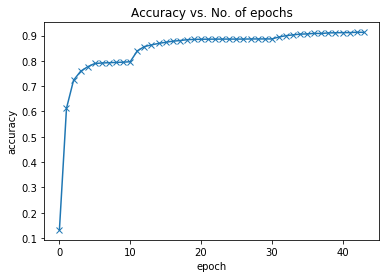

In [150]:
accuracies = [result['val_acc'] for result in histories]
plt.plot(accuracies, '-x')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.title('Accuracy vs. No. of epochs');

It's quite clear from the above picture that the model probably won't cross the accuracy threshold of 90% even after training for a very long time. One possible reason for this is that the learning rate might be too high. The model's parameters may be "bouncing" around the optimal set of parameters for the lowest loss. You can try reducing the learning rate and training for a few more epochs to see if it helps.

The more likely reason that the model just isn't powerful enough. If you remember our initial hypothesis, we have assumed that the output (in this case the class probabilities) is a linear function of the input (pixel intensities), obtained by perfoming a matrix multiplication with the weights matrix and adding the bias. This is a fairly weak assumption, as there may not actually exist a linear relationship between the pixel intensities in an image and the digit it represents. While it works reasonably well for a simple dataset like MNIST (getting us to 85% accuracy), we need more sophisticated models that can capture non-linear relationships between image pixels and labels for complex tasks like recognizing everyday objects, animals etc.

## Testing with individual images

In [152]:
# Define test dataset
test_dataset = MNIST(root='data/', 
                     train=False,
                     transform=transforms.ToTensor())

Shape: torch.Size([1, 28, 28])
Label: 7


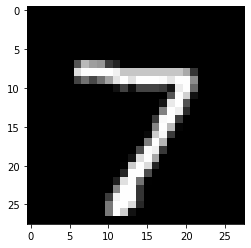

In [153]:
img, label = test_dataset[0]
plt.imshow(img[0], cmap='gray')
print('Shape:', img.shape)
print('Label:', label)

In [154]:
def predict_image(img, model):
    xb = img.unsqueeze(0)
    yb = model(xb)
    _, preds = torch.max(yb, dim=1)
    return preds[0].item()

Label: 7 , Predicted: 7


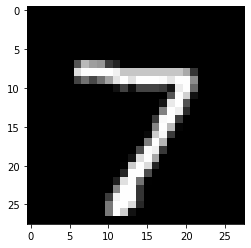

In [155]:
img, label = test_dataset[0]
plt.imshow(img[0], cmap='gray')
print('Label:', label, ', Predicted:', predict_image(img, model))

Label: 0 , Predicted: 0


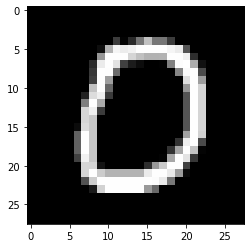

In [156]:
img, label = test_dataset[10]
plt.imshow(img[0], cmap='gray')
print('Label:', label, ', Predicted:', predict_image(img, model))

In [157]:
test_loader = DataLoader(test_dataset, batch_size=256)
result = evaluate(model, test_loader)
result

{'val_loss': 0.27865976095199585, 'val_acc': 0.921093761920929}

# Saving and loading the model


In [158]:
torch.save(model.state_dict(), 'mnist-logistic.pth')

In [159]:
model.state_dict()

OrderedDict([('linear.weight',
              tensor([[-0.0255,  0.0236,  0.0340,  ...,  0.0076,  0.0081, -0.0187],
                      [-0.0193,  0.0146,  0.0147,  ..., -0.0296, -0.0280,  0.0240],
                      [-0.0207,  0.0296, -0.0122,  ...,  0.0239, -0.0155, -0.0025],
                      ...,
                      [-0.0044,  0.0236, -0.0137,  ..., -0.0185, -0.0196, -0.0320],
                      [ 0.0046,  0.0224,  0.0195,  ...,  0.0344,  0.0273, -0.0241],
                      [-0.0131,  0.0199, -0.0325,  ..., -0.0265,  0.0268, -0.0113]])),
             ('linear.bias',
              tensor([-0.3810,  0.3320,  0.0856, -0.2396,  0.0251,  1.2420, -0.1183,  0.6515,
                      -1.4571, -0.2522]))])

In [160]:
model2 = MnistModel()
model2.load_state_dict(torch.load('mnist-logistic.pth'))
model2.state_dict()


OrderedDict([('linear.weight',
              tensor([[-0.0255,  0.0236,  0.0340,  ...,  0.0076,  0.0081, -0.0187],
                      [-0.0193,  0.0146,  0.0147,  ..., -0.0296, -0.0280,  0.0240],
                      [-0.0207,  0.0296, -0.0122,  ...,  0.0239, -0.0155, -0.0025],
                      ...,
                      [-0.0044,  0.0236, -0.0137,  ..., -0.0185, -0.0196, -0.0320],
                      [ 0.0046,  0.0224,  0.0195,  ...,  0.0344,  0.0273, -0.0241],
                      [-0.0131,  0.0199, -0.0325,  ..., -0.0265,  0.0268, -0.0113]])),
             ('linear.bias',
              tensor([-0.3810,  0.3320,  0.0856, -0.2396,  0.0251,  1.2420, -0.1183,  0.6515,
                      -1.4571, -0.2522]))])

In [161]:
test_loader = DataLoader(test_dataset, batch_size=256)
result = evaluate(model2, test_loader)
result

{'val_loss': 0.27865976095199585, 'val_acc': 0.921093761920929}